# Employee Absenteeism

>  The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

----

#  Aim

> The exercise will address `Absenteeism` at a company during work time.

---

##  Problem 
> The problem is that the work environment of today is more:
> - Competitive
> - Managers set unachievable business goals
> - have an elevated risk of becoming unemployed

> This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.

---

## ‍ What is Absenteeism?
> Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.
> - Based on what information should we predict whether an employee is expected to be absent or not?
> - How should we measure absenteeism?

---

##  Purpose of the business exercise:

> Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

> We want to know for how many working hours any employee could be away from work based on information like:
> - How far they live from their workplace.
> - How many children and pets they have.
> - Do they have higher education?

In [1]:
!pip install -q hvplot
!pip install -q xlrd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [3]:
data = pd.read_excel('D:/Employee_Absenteeism/Absent_at_work.xls')
data.columns = data.columns.str.replace(" ", "_")

data.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# 📊  Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               737 non-null    float64
 2   Month_of_absence                 739 non-null    float64
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           733 non-null    float64
 6   Distance_from_Residence_to_Work  737 non-null    float64
 7   Service_time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work_load_Average/day_           730 non-null    float64
 10  Hit_target                       734 non-null    float64
 11  Disciplinary_failure             734 non-null    float64
 12  Education             

In [5]:
data = data.dropna()

The data doesn't have any missing values.

In [6]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,...,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00
mean,17.73,19.20,6.16,3.89,2.52,221.09,29.67,12.73,36.69,270782.13,...,0.05,1.31,1.02,0.57,0.07,0.74,79.31,172.14,26.77,7.02
std,11.04,8.49,3.34,1.43,1.09,64.97,14.70,4.36,6.57,39049.26,...,0.22,0.69,1.08,0.49,0.26,1.32,12.95,6.05,4.34,13.81
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,...,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,8.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,...,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264249.00,...,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,27.00,9.00,5.00,3.00,260.00,50.00,16.00,40.00,284853.00,...,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,...,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [7]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

===============Column: ID==============
Number of unique values: 36
Max: 36
Min: 1
===============Column: Reason_for_absence==============
Number of unique values: 27
Max: 28.0
Min: 0.0
===============Column: Month_of_absence==============
Number of unique values: 13
Max: 12.0
Min: 0.0
===============Column: Day_of_the_week==============
Number of unique values: 5
Max: 6
Min: 2
===============Column: Seasons==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Transportation_expense==============
Number of unique values: 24
Max: 388.0
Min: 118.0
===============Column: Distance_from_Residence_to_Work==============
Number of unique values: 25
Max: 52.0
Min: 5.0
===============Column: Service_time==============
Number of unique values: 18
Max: 29.0
Min: 1.0
===============Column: Age==============
Number of unique values: 22
Max: 58.0
Min: 27.0
===============Column: Work_load_Average/day_==============
Number of unique values: 38
Max: 378884.0
Min: 205917.0
=====

In [8]:
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [9]:
data.ID.nunique()


36

In [10]:
data.ID.value_counts().hvplot.hist(bins=data.ID.nunique(), height=300, width=500)

:Histogram   [count]   (Count)

`ID`: individual identification (in this case we have 34 employees) indicates precisely who has been away during working hours.  Will this information improve our analysis in any way? No, because it's only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information).

So we are going to drop this column

In [11]:
data.drop('ID', axis=1, inplace=True)

In [15]:
for col in cat_col:
    print(col)

Month_of_absence
Day_of_the_week
Seasons
Service_time
Hit_target
Disciplinary_failure
Education
Son
Social_drinker
Social_smoker
Pet
Height
Body_mass_index
Absenteeism_time_in_hours


`Reason for Absence`: We have `28` reason of absence from `0` to `28`.

In [16]:
cat_col = [col for col in data.columns if data[col].nunique() < 20]

for col in cat_col:
    globals()[col] = data[col].value_counts().hvplot.bar(height=350, width=350)
    


In [17]:
Education

:Bars   [Education]   (count)

In [18]:
cat_col[0]

'Month_of_absence'

In [19]:
Month_of_absence

:Bars   [Month_of_absence]   (count)

In [20]:
day_list=data['Day_of_the_week'].tolist()
from functools import reduce

total_days = reduce((lambda x, y: x + y), day_list)
total_days

2484

In [21]:
# Visulazing the distibution of the data for every feature
data.hvplot.hist(y='Reason_for_absence', height=350, width=350)

:Histogram   [Reason_for_absence]   (Count)

In [22]:
Month_of_absence

:Bars   [Month_of_absence]   (count)

In [23]:

data.hvplot.hist(y='Month_of_absence', bins=12, width=350, height=350)



:Histogram   [Month_of_absence]   (Count)

In [24]:
data['Day_of_the_week'].value_counts().hvplot.bar(height=350, width=350)

:Bars   [Day_of_the_week]   (count)

In [25]:
data['Seasons'].value_counts().hvplot.bar(height=350, width=350)

:Bars   [Seasons]   (count)

In [26]:
data.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [27]:
print(f"{data['Absenteeism_time_in_hours'].value_counts()}")

Absenteeism_time_in_hours
8.00      178
2.00      136
3.00       99
1.00       78
4.00       52
0.00       34
16.00      17
24.00      15
40.00       7
5.00        6
80.00       3
120.00      3
32.00       3
112.00      2
64.00       2
7.00        1
56.00       1
104.00      1
48.00       1
Name: count, dtype: int64


In [28]:
print(data['Absenteeism_time_in_hours'].value_counts()[0])

34


In [29]:
print(data['Absenteeism_time_in_hours'].value_counts()[1])

78


In [30]:

print(f"{data['Absenteeism_time_in_hours'].value_counts().iloc[0]/ data['Absenteeism_time_in_hours'].value_counts().iloc[1]}")

1.3088235294117647


In [31]:
data["Reason_for_absence"].value_counts()

Reason_for_absence
23.00    119
28.00    102
27.00     60
13.00     51
0.00      34
19.00     33
26.00     30
25.00     30
22.00     29
11.00     24
10.00     22
18.00     16
14.00     16
1.00      16
7.00      15
12.00      8
6.00       6
21.00      5
8.00       5
24.00      3
5.00       3
9.00       3
16.00      3
15.00      2
4.00       2
3.00       1
2.00       1
Name: count, dtype: int64

In [32]:
data["Reason_for_absence"] = data["Reason_for_absence"].map(
{
0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1",
4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1",
8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1",
12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2",
16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3",
19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4",
23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4",
27: "Group_4", 28: "Group_4"
}
)
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason_for_absence"].value_counts()


Reason_for_absence
Group_4    373
Group_1    207
Group_3     54
Group_2      5
Name: count, dtype: int64

In [34]:
data_1 = pd.get_dummies(data, columns=['Reason_for_absence'])

In [35]:
data_1.head()

,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,...,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Reason_for_absence_Group_1,Reason_for_absence_Group_2,Reason_for_absence_Group_3,Reason_for_absence_Group_4
0,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,4.00,False,False,False,True
1,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,97.00,1.00,...,0.00,0.00,98.00,178.00,31.00,0.00,True,False,False,False
2,7.00,4,1,179.00,51.00,18.00,38.00,239554.00,97.00,0.00,...,0.00,0.00,89.00,170.00,31.00,2.00,False,False,False,True
3,7.00,5,1,279.00,5.00,14.00,39.00,239554.00,97.00,0.00,...,1.00,0.00,68.00,168.00,24.00,4.00,True,False,False,False
4,7.00,5,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,2.00,False,False,False,True


In [36]:
data_1.dtypes

Month_of_absence                   float64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average/day_             float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Son                                float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
Reason_for_absence_Group_1            bool
Reason_for_absence_Group_2            bool
Reason_for_absence_Group_3            bool
Reason_for_absence_Group_4            bool
dtype: obje

In [37]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
Reason_for_absence_Group_1         0
Reason_for_absence_Group_2         0
Reason_for_absence_Group_3         0
Reason_for_absence_Group_4         0
dtype: int64

In [38]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [39]:
data_1.Education.value_counts()

Education
0    522
1    117
Name: count, dtype: int64

In [40]:
print(f"Null Values Sum: {data_1.Education.isna().sum()}")

Null Values Sum: 0


In [41]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Son', 'Social_drinker', 'Social_smoker', 'Pet',
       'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours',
       'Reason_for_absence_Group_1', 'Reason_for_absence_Group_2',
       'Reason_for_absence_Group_3', 'Reason_for_absence_Group_4',
       'Education_1'],
      dtype='object')

In [42]:
data_2.head()

,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,...,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Reason_for_absence_Group_1,Reason_for_absence_Group_2,Reason_for_absence_Group_3,Reason_for_absence_Group_4,Education_1
0,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,1.00,90.00,172.00,30.00,4.00,False,False,False,True,False
1,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,97.00,1.00,...,0.00,98.00,178.00,31.00,0.00,True,False,False,False,False
2,7.00,4,1,179.00,51.00,18.00,38.00,239554.00,97.00,0.00,...,0.00,89.00,170.00,31.00,2.00,False,False,False,True,False
3,7.00,5,1,279.00,5.00,14.00,39.00,239554.00,97.00,0.00,...,0.00,68.00,168.00,24.00,4.00,True,False,False,False,False
4,7.00,5,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,1.00,90.00,172.00,30.00,2.00,False,False,False,True,False


<Axes: >

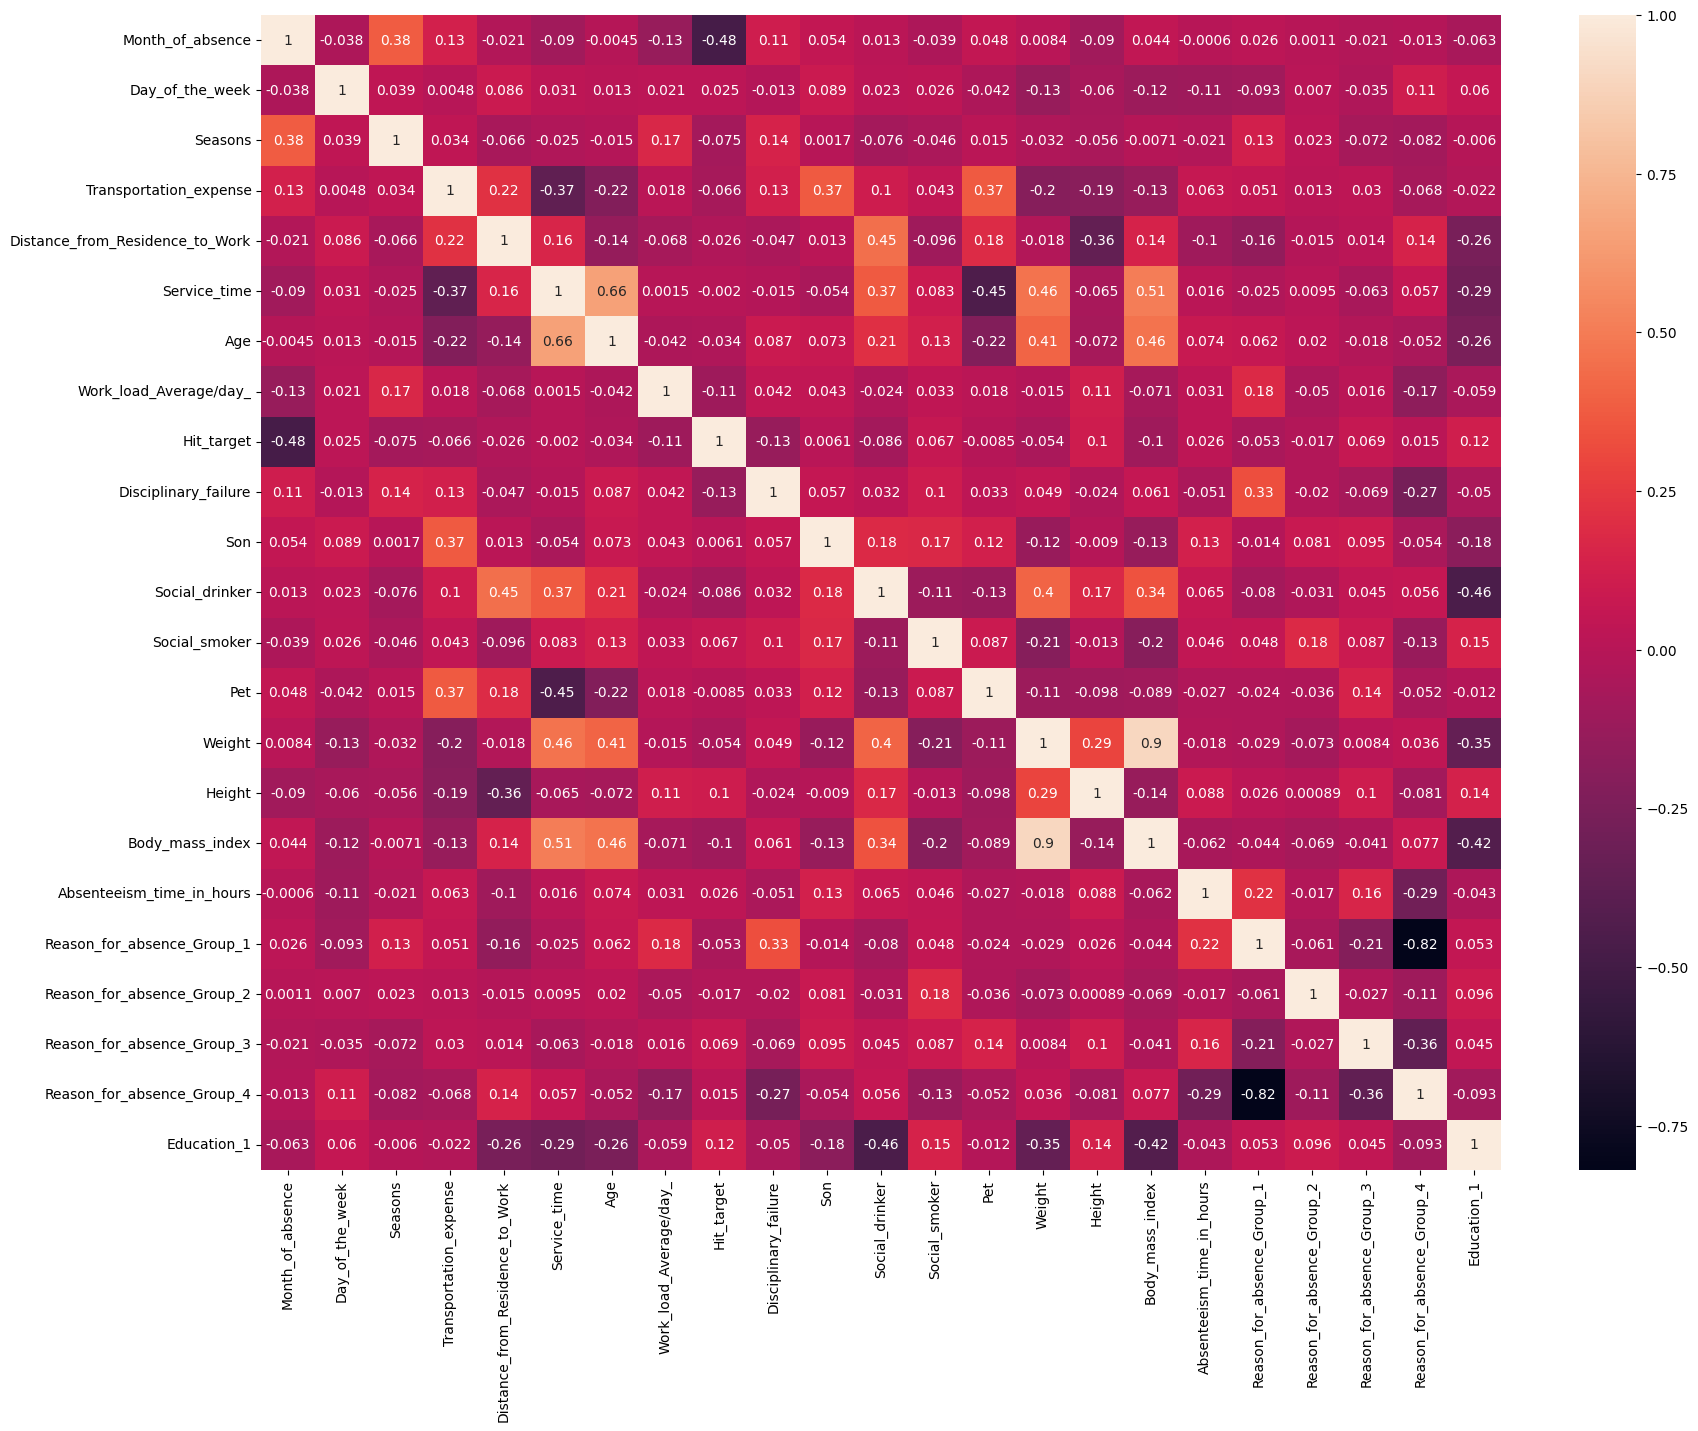

In [43]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

<Axes: >

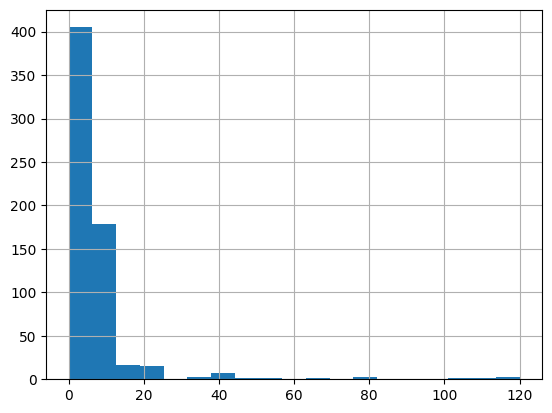

In [44]:
data_2['Absenteeism_time_in_hours'].hist(bins=data_2['Absenteeism_time_in_hours'].nunique())

# 🤖 Applying machine learning algorthims

In [45]:
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC


X = data_2.drop('Absenteeism_time_in_hours', axis=1)
y = np.where(data_2["Absenteeism_time_in_hours"] > data_2["Absenteeism_time_in_hours"].median(), 1, 0)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X shape: (639, 22)
y shape: (639,)


In [47]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# ✔️ Logistic Regression

In [48]:
print("\n=========LOGISTIC REGRESSION============")
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)


=========LOGISTIC REGRESSION============
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[199  49]
 [ 54 145]]
ACCURACY SCORE:
0.7696
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.75      0.77       0.77          0.77
recall      0.80   0.73      0.77       0.77          0.77
f1-score    0.79   0.74      0.77       0.77          0.77
support   248.00 199.00      0.77     447.00        447.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[84 15]
 [36 57]]
ACCURACY SCORE:
0.7344
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.70  0.79      0.73       0.75          0.74
recall     0.85  0.61      0.73       0.73          0.73
f1-score   0.77  0.69      0.73       0.73          0.73
support   99.00 93.00      0.73     192.00        192.00


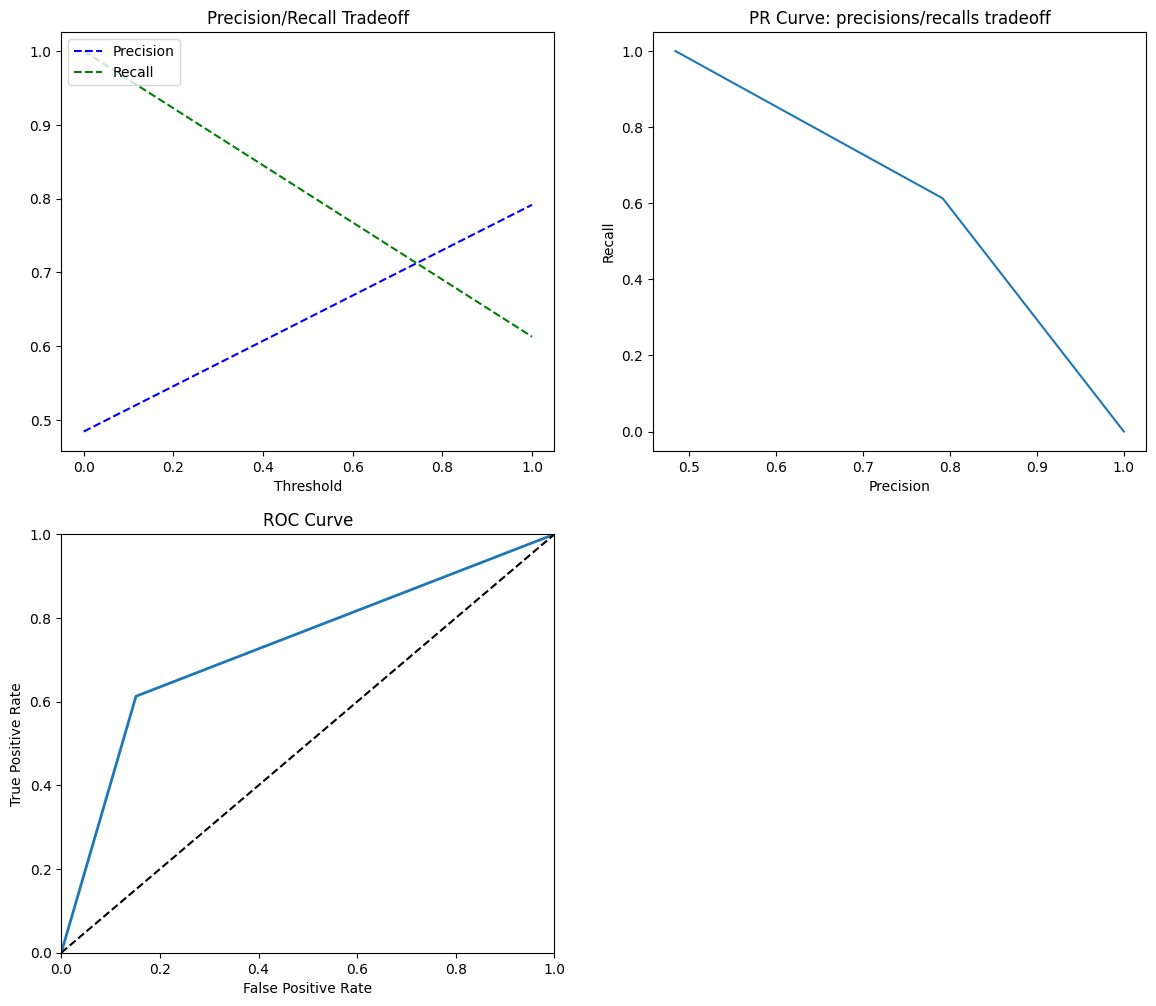

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [50]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
    },
}

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task. In our case we need to predict if an employee will absent accuratly. so we need to increase 

In [51]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)

print(f"Scores: {scores}")
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Scores: [0.75555556 0.75555556 0.62222222 0.82222222 0.73333333 0.75555556
 0.66666667 0.79545455 0.72727273 0.77272727]
Cross-Validation score mean: 74.07% (+/-5.58)


In [52]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(lr_clf.coef_)
summary_table

,Features_name,Coefficients
0,Month_of_absence,0.15
1,Day_of_the_week,-0.20
2,Seasons,-0.22
3,Transportation_expense,0.56
4,Distance_from_Residence_to_Work,-0.11
5,Service_time,-0.03
6,Age,-0.27
7,Work_load_Average/day_,0.10
8,Hit_target,-0.09
9,Disciplinary_failure,-0.98


In [53]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_clf.intercept_[0]]
summary_table.sort_index(inplace=True)

In [54]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
11,Son,0.63,1.87
4,Transportation_expense,0.56,1.76
12,Social_drinker,0.27,1.31
15,Weight,0.25,1.28
1,Month_of_absence,0.15,1.16
8,Work_load_Average/day_,0.10,1.11
20,Reason_for_absence_Group_3,0.05,1.05
17,Body_mass_index,0.00,1.00
18,Reason_for_absence_Group_1,0.00,1.00
22,Education_1,0.00,1.00


# ✔️ Random Forest

In [55]:
print("\n=========RANDOM FOREST============")
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=5, verbose=1, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)


=========RANDOM FOREST============
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


C:\Users\maney\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1664 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maney\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maney\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\maney\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[243   5]
 [  6 193]]
ACCURACY SCORE:
0.9754
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   0.97      0.98       0.98          0.98
recall      0.98   0.97      0.98       0.97          0.98
f1-score    0.98   0.97      0.98       0.98          0.98
support   248.00 199.00      0.98     447.00        447.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[85 14]
 [36 57]]
ACCURACY SCORE:
0.7396
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.70  0.80      0.74       0.75          0.75
recall     0.86  0.61      0.74       0.74          0.74
f1-score   0.77  0.70      0.74       0.73          0.74
support   99.00 93.00      0.74     192.00        192.00


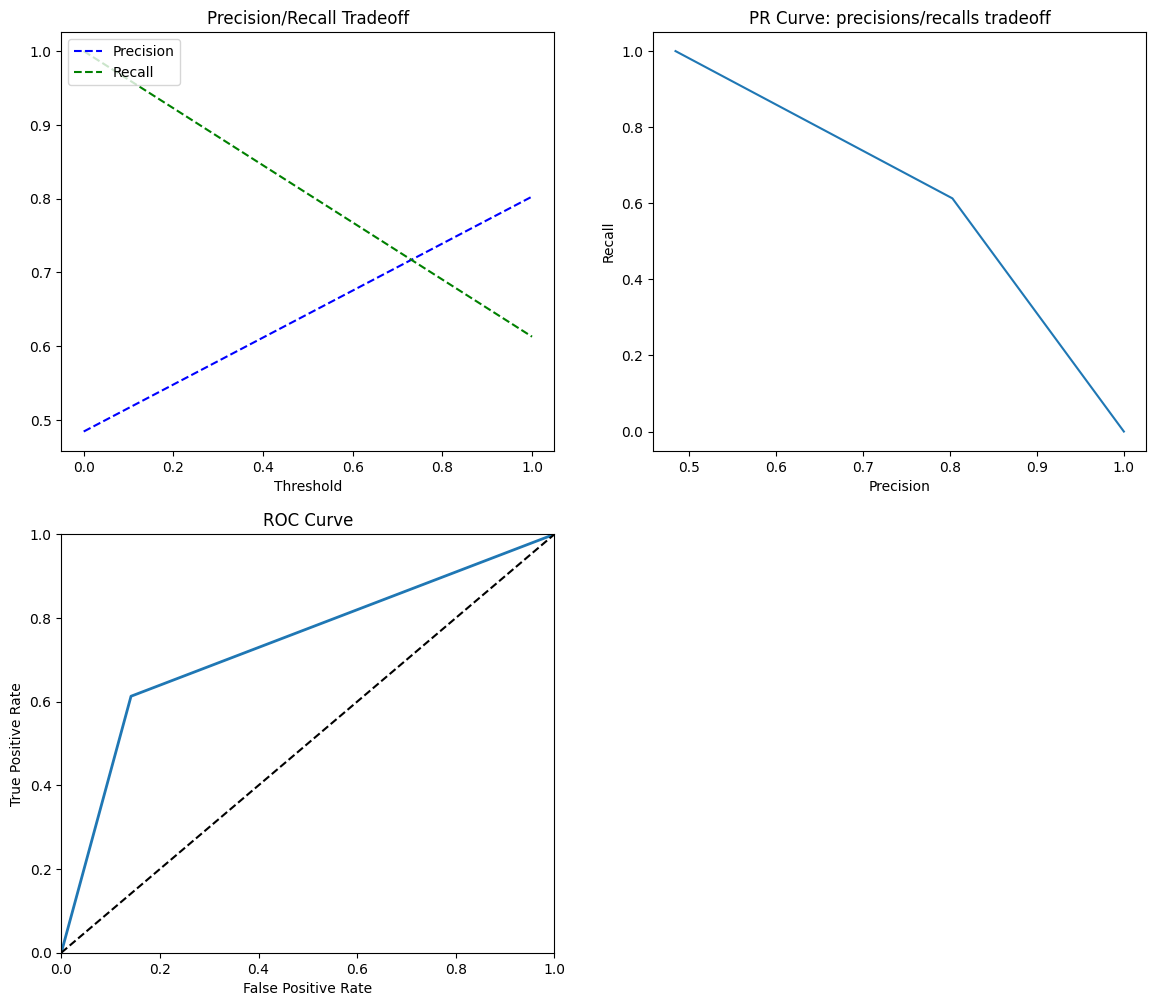

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [57]:
scores_dict['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

# ✔️ XGBoost

In [58]:
n_estimators = [50, 100, 250]
max_depth = [2, 3, 5, 10, 15]
# booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.5, 0.9, 1]
min_child_weight = [1, 2, 3, 4]
subsample = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bytree = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bynode = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bylevel = [0.5, 0.75, 0.85, 0.9, 1]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth,
    'learning_rate' : learning_rate, 
    'min_child_weight' : min_child_weight, 
#     'booster' : booster, 
    'base_score' : base_score,
    'subsample': subsample,
#     'colsample_bytree': colsample_bytree,
#     'colsample_bynode': colsample_bynode,
#     'colsample_bylevel': colsample_bylevel,
}

xgb_clf = xgb.XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=5, scoring = 'f1',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
Best paramters: {'base_score': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 250, 'subsample': 1}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[243   5]
 [  9 190]]
ACCURACY SCORE:
0.9687
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   0.97      0.97       0.97          0.97
recall      0.98   0.95      0.97       0.97          0.97
f1-score    0.97   0.96      0.97       0.97          0.97
support   248.00 199.00      0.97     447.00        447.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[83 16]
 [32 61]]
ACCURACY SCORE:
0.7500
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.79      0.75       0.76          0.76
recall     0.84  0.66      0.75       0.75          0.75
f1-score   0.78  0.72      0.75       0.75          0.75
support   99.00 93.00      0.75     192.00        192.00


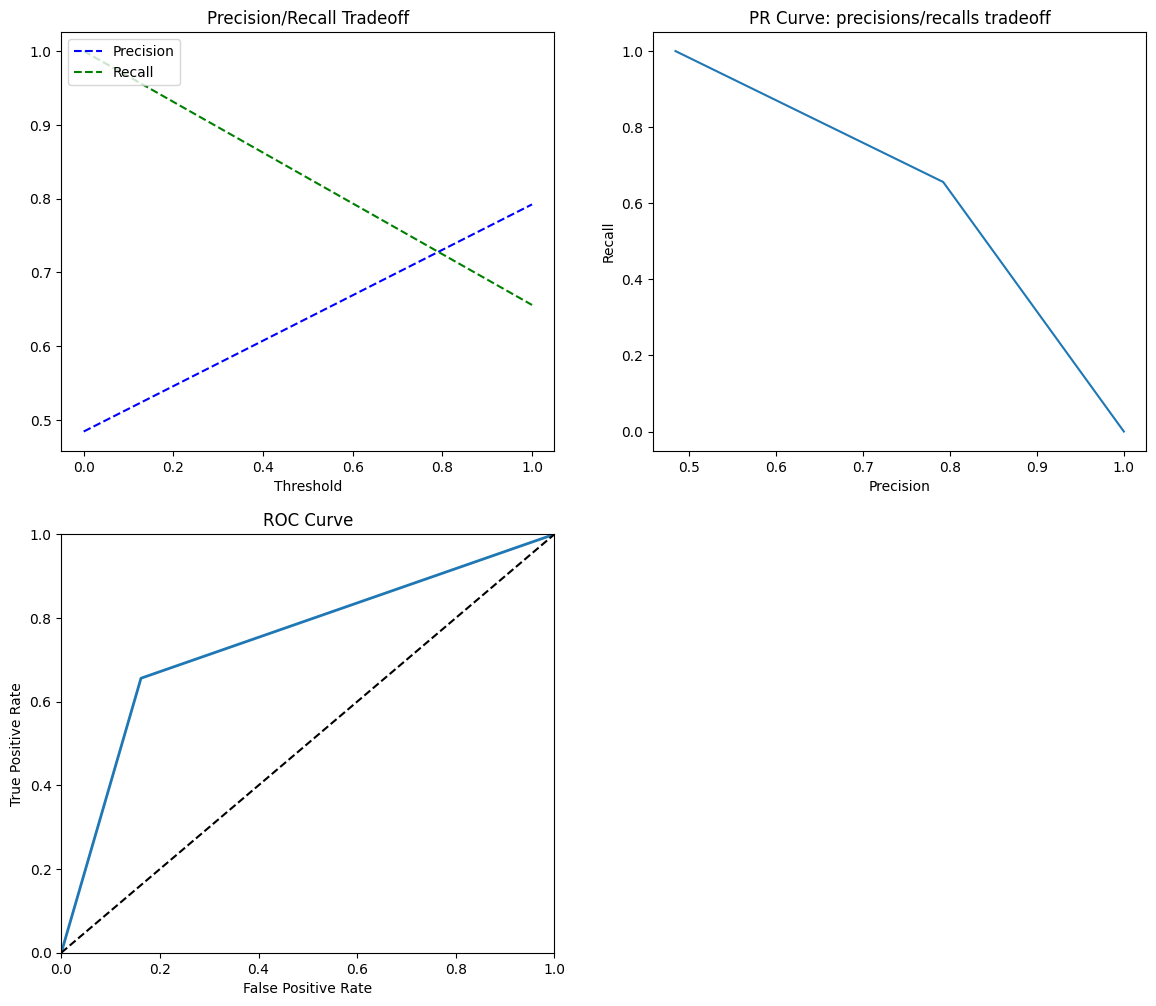

In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [60]:
scores_dict['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

# ✔️ Support Vector Machine

In [61]:
param_grid = {
    'C': [60, 70, 75, 65 ], 
    'gamma': [0.002, 0.001, 0.0009, 0.0008, 0.0007], 
    'kernel': ['rbf', 'poly', 'linear']
} 

svm_cv = GridSearchCV(SVC(), param_grid, scoring='f1', verbose=1, cv=5)
svm_cv.fit(X_train, y_train)

best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'C': 60, 'gamma': 0.002, 'kernel': 'linear'}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[193  55]
 [ 56 143]]
ACCURACY SCORE:
0.7517
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.78   0.72      0.75       0.75          0.75
recall      0.78   0.72      0.75       0.75          0.75
f1-score    0.78   0.72      0.75       0.75          0.75
support   248.00 199.00      0.75     447.00        447.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[84 15]
 [33 60]]
ACCURACY SCORE:
0.7500
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.80      0.75       0.76          0.76
recall     0.85  0.65      0.75       0.75          0.75
f1-score   0.78  0.71      0.75       0.75          0.75
support   99.00 93.00      0.75     192.00        192.00


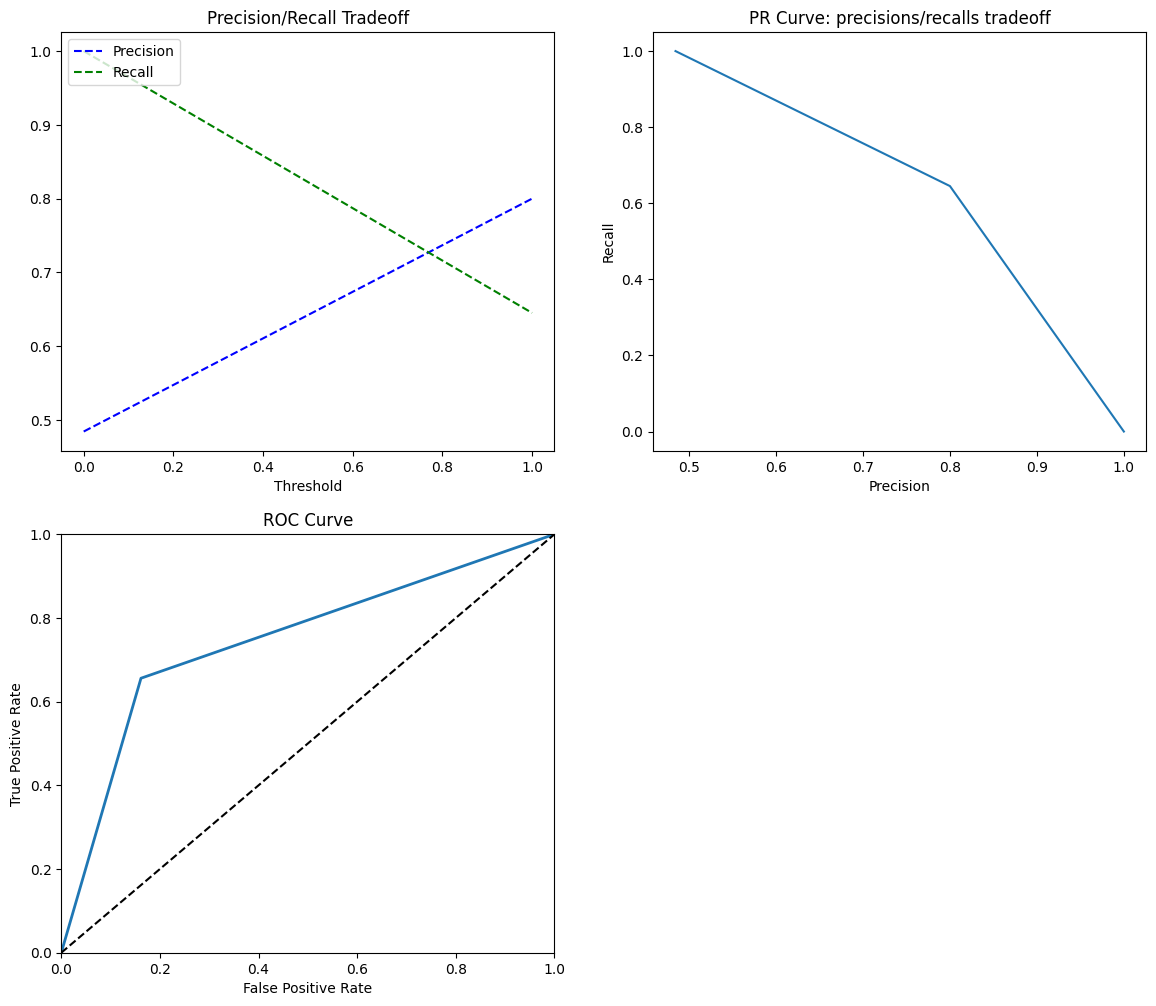

In [62]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [63]:
scores_dict['Support Vector Machine'] = {
        'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    }

# 🎯 Comparing Machine Learning models 📊

Area Under the Curve score (AUC) is good way to compare classifiers. A perfect classifier AUC will have a ROC AUC equal to 1.

In [64]:
ml_models = {
    'Logistic Regression': lr_clf, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf, 
    'Support Vector Machine': svm_clf
}
for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION roc_auc_score: 0.731
RANDOM FOREST roc_auc_score: 0.736
XGBOOST roc_auc_score: 0.747
SUPPORT VECTOR MACHINE roc_auc_score: 0.747


<Axes: >

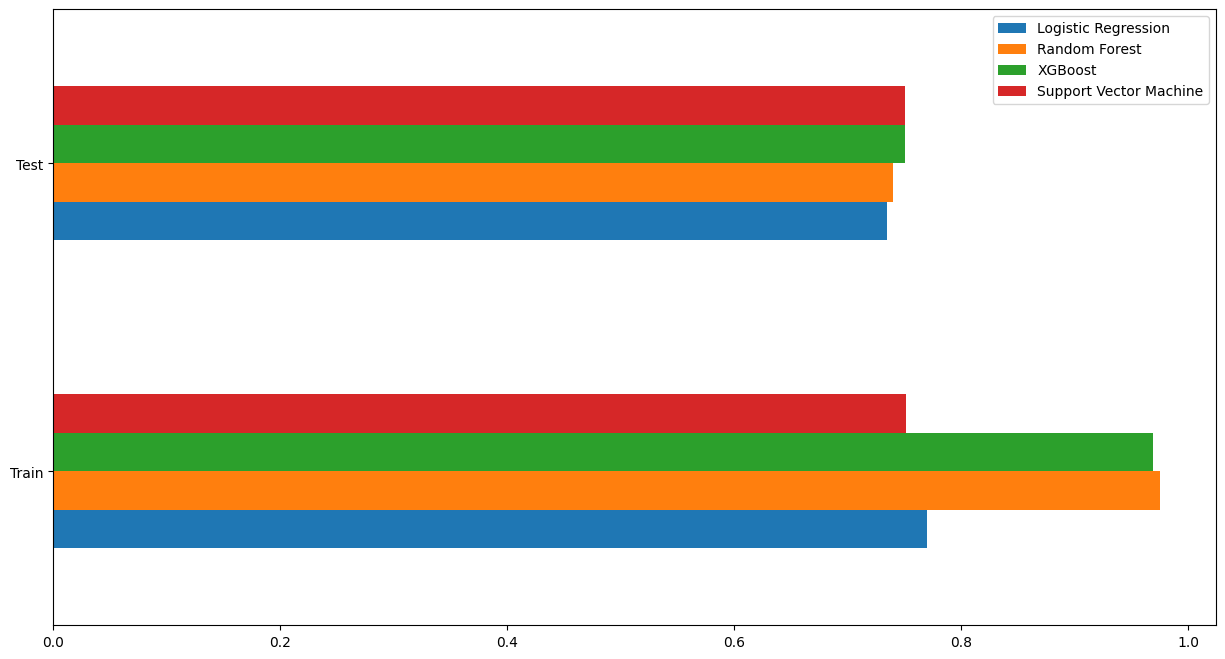

In [65]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

# 💽 Save the models

In [66]:
with open('Xgb_clf', 'wb') as file:
    pickle.dump(xgb_clf, file)

with open('Rf_clf', 'wb') as file:
    pickle.dump(rf_clf, file)